# ETL

<p>En este caso, se utilizó Google Colab importando archivos desde Drive. Se dejarán como comentarios las opciones de importación desde una carpeta local (asumiento que los archivos estén en el mismo directorio que este notebook).

In [ ]:
import pandas as pd
import numpy as np
import json
import gzip
import os

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Games

In [ ]:
games = pd.read_json(gzip.open("/content/drive/MyDrive/steam_games.json.gz", 'rb'), lines=True)
#games = pd.read_json(gzip.open("steam_games.json.gz", 'rb'), lines=True)
games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 11.9+ MB


In [ ]:
games = games[games.url.notnull()]
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 88310 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        28852 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 3.4+ MB


In [ ]:
games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980.0,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290.0,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400.0,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,None


In [ ]:
mask = games.app_name != games.title
games[mask]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,None
88321,None,None,Icarus Six Sixty Six,None,http://store.steampowered.com/app/724910/Icaru...,None,[Casual],http://steamcommunity.com/app/724910/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",Free,0.0,724910.0,None
88329,None,None,After Life VR,None,http://store.steampowered.com/app/772590/After...,None,"[Early Access, Indie, VR]",http://steamcommunity.com/app/772590/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",4.99,1.0,772590.0,None
88330,None,None,Kitty Hawk,None,http://store.steampowered.com/app/640250/Kitty...,None,"[Early Access, Action, Adventure, Indie, Casual]",http://steamcommunity.com/app/640250/reviews/?...,"[Single-player, Steam Leaderboards, HTC Vive, ...",2.99,1.0,640250.0,None
88332,None,None,Mortars VR,None,http://store.steampowered.com/app/711440/Morta...,None,"[Early Access, Strategy, Action, Indie, Casual...",http://steamcommunity.com/app/711440/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.99,1.0,711440.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120383,None,None,Tank of War-VR,None,http://store.steampowered.com/app/745900/Tank_...,None,"[Action, Massively Multiplayer, Strategy, VR, ...",http://steamcommunity.com/app/745900/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",19.99,0.0,745900.0,None
120386,None,None,Flappy Arms,None,http://store.steampowered.com/app/764110/Flapp...,None,"[Casual, Simulation, VR, Funny, Colorful, Come...",http://steamcommunity.com/app/764110/reviews/?...,"[Single-player, Steam Leaderboards, HTC Vive, ...",1.99,0.0,764110.0,None
120387,None,None,SpaceWalker,None,http://store.steampowered.com/app/705860/Space...,None,"[Early Access, Casual]",http://steamcommunity.com/app/705860/reviews/?...,"[Single-player, HTC Vive, Oculus Rift, Tracked...",Free,1.0,705860.0,None
120395,None,None,LIV Client,None,http://store.steampowered.com/app/755540/LIV_C...,None,"[Video Production, Utilities, Web Publishing]",http://steamcommunity.com/app/755540/reviews/?...,"[Steam Workshop, Steam Cloud, HTC Vive, Oculus...",None,0.0,755540.0,None


<p>Para los casos en los que el género es nulo, se utilizarán los valores en las columnas tags y specs para realizar la imputación de valores

In [ ]:
games[games.genres.isnull()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,None
88321,None,None,Icarus Six Sixty Six,None,http://store.steampowered.com/app/724910/Icaru...,None,[Casual],http://steamcommunity.com/app/724910/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",Free,0.0,724910.0,None
88329,None,None,After Life VR,None,http://store.steampowered.com/app/772590/After...,None,"[Early Access, Indie, VR]",http://steamcommunity.com/app/772590/reviews/?...,"[Single-player, HTC Vive, Tracked Motion Contr...",4.99,1.0,772590.0,None
88330,None,None,Kitty Hawk,None,http://store.steampowered.com/app/640250/Kitty...,None,"[Early Access, Action, Adventure, Indie, Casual]",http://steamcommunity.com/app/640250/reviews/?...,"[Single-player, Steam Leaderboards, HTC Vive, ...",2.99,1.0,640250.0,None
88332,None,None,Mortars VR,None,http://store.steampowered.com/app/711440/Morta...,None,"[Early Access, Strategy, Action, Indie, Casual...",http://steamcommunity.com/app/711440/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",0.99,1.0,711440.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120428,None,None,Robotpencil Presents: Exercise: Brushwork,Robotpencil Presents: Exercise: Brushwork,http://store.steampowered.com/app/775640/Robot...,2018-01-03,"[Design & Illustration, Tutorial]",http://steamcommunity.com/app/775640/reviews/?...,None,3.99,0.0,775640.0,None
120429,None,None,Robotpencil Presents: Creative Composition,Robotpencil Presents: Creative Composition,http://store.steampowered.com/app/777930/Robot...,2018-01-03,"[Design & Illustration, Tutorial]",http://steamcommunity.com/app/777930/reviews/?...,None,3.99,0.0,777930.0,None
120430,None,None,The Gamble House,The Gamble House,http://store.steampowered.com/app/775370/The_G...,2016-11-19,[Movie],http://steamcommunity.com/app/775370/reviews/?...,[Captions available],4.99,0.0,775370.0,None
120431,None,None,Kalen Chock Presents: 2017 Free Tutorial,Kalen Chock Presents: 2017 Free Tutorial,http://store.steampowered.com/app/777950/Kalen...,2018-01-03,"[Design & Illustration, Tutorial]",http://steamcommunity.com/app/777950/reviews/?...,None,Free,0.0,777950.0,None


In [ ]:
#Encontrar los géneros disponibles
genres = []
for gs in games.genres:
  if gs is not None: genres.extend(gs)
genres = set(genres)
genres

{'Accounting',
 'Action',
 'Adventure',
 'Animation &amp; Modeling',
 'Audio Production',
 'Casual',
 'Design &amp; Illustration',
 'Early Access',
 'Education',
 'Free to Play',
 'Indie',
 'Massively Multiplayer',
 'Photo Editing',
 'RPG',
 'Racing',
 'Simulation',
 'Software Training',
 'Sports',
 'Strategy',
 'Utilities',
 'Video Production',
 'Web Publishing'}

In [ ]:
#Función para imputar los géneros nulos
def imputar_gns_nulos(tags, specs):
  gs = []
  #Añadir las etiquetas que aparezcan como géneros
  if tags is not None:
    for tag in tags:
      if tag in genres:
        gs.append(tag)
  #Añadir las specs que aparezcan como géneros
  if specs is not None:
    for spec in specs:
      if spec in genres:
        gs.append(spec)
  return str(gs)

In [ ]:
#Iterar las filas y añadir los géneros correspondientes donde este campo sea nulo
for row in games.itertuples():
  if row.genres is None:
    games.loc[row.Index, "genres"] = imputar_gns_nulos(row.tags, row.specs)
games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140.0,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980.0,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290.0,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400.0,彼岸领域
88314,None,"['Action', 'Indie', 'Casual', 'Sports']",Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,None,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570.0,None


In [ ]:
games[games.genres.isna()]

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer


<p>Para evitar errores de procesamiento, se convertirá  el campo generos a String (actualmente está como lista)

In [ ]:
games["genres"] = games["genres"].astype(str)
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 88310 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     24083 non-null  object 
 1   genres        32135 non-null  object 
 2   app_name      32133 non-null  object 
 3   title         30085 non-null  object 
 4   url           32135 non-null  object 
 5   release_date  30068 non-null  object 
 6   tags          31972 non-null  object 
 7   reviews_url   32133 non-null  object 
 8   specs         31465 non-null  object 
 9   price         30758 non-null  object 
 10  early_access  32135 non-null  float64
 11  id            32133 non-null  float64
 12  developer     28836 non-null  object 
dtypes: float64(2), object(11)
memory usage: 4.4+ MB


In [ ]:
games = games[["id", "app_name", "genres", "price", "release_date", "developer"]]
games.head()

,id,app_name,genres,price,release_date,developer
88310,761140.0,Lost Summoner Kitty,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",4.99,2018-01-04,Kotoshiro
88311,643980.0,Ironbound,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Free To Play,2018-01-04,Secret Level SRL
88312,670290.0,Real Pool 3D - Poolians,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Free to Play,2017-07-24,Poolians.com
88313,767400.0,弹炸人2222,"['Action', 'Adventure', 'Casual']",0.99,2017-12-07,彼岸领域
88314,773570.0,Log Challenge,"['Action', 'Indie', 'Casual', 'Sports']",2.99,None,None


## Revisión de filas duplicadas


In [ ]:
games[games.duplicated()]

,id,app_name,genres,price,release_date,developer
102883,612880.0,Wolfenstein II: The New Colossus,['Action'],59.99,2017-10-26,Machine Games


In [ ]:
games[games.id == 612880]

,id,app_name,genres,price,release_date,developer
102204,612880.0,Wolfenstein II: The New Colossus,['Action'],59.99,2017-10-26,Machine Games
102883,612880.0,Wolfenstein II: The New Colossus,['Action'],59.99,2017-10-26,Machine Games


In [ ]:
games.drop_duplicates(inplace=True)
games[games.duplicated()]

,id,app_name,genres,price,release_date,developer


## Tratamiento de nulos

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32134 entries, 88310 to 120444
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32132 non-null  float64
 1   app_name      32132 non-null  object 
 2   genres        32134 non-null  object 
 3   price         30757 non-null  object 
 4   release_date  30067 non-null  object 
 5   developer     28835 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.7+ MB


### Columna id

In [ ]:
games[games.id.isna()]

,id,app_name,genres,price,release_date,developer
88384,NaN,None,[],19.99,None,None
119271,NaN,Batman: Arkham City - Game of the Year Edition,"['Action', 'Adventure']",19.99,2012-09-07,"Rocksteady Studios,Feral Interactive (Mac)"


<p> El registro 119271 contiene la información de un videojuego, por lo que debería imputarse el valor. Realizando una búsqueda por internet, se tiene que su id debería ser 200260. Por otra parte, el registro 88384 solo contiene la información de un precio, así que no debería conservarse.

In [ ]:
games.loc[119271, "id"] = "200260"

In [ ]:
games.dropna(subset=["id"], inplace=True)

In [ ]:
games[games.id.isna()]

,id,app_name,genres,price,release_date,developer


### Columna app_name

<p>En este caso, se encontró que el juego con id 317160 es el juego Duet.

In [ ]:
games[games.app_name.isna()]

,id,app_name,genres,price,release_date,developer
90890,317160.0,None,"['Action', 'Indie']",None,2014-08-26,None


In [ ]:
games.loc[90890, "app_name"] = "Duet"

In [ ]:
games[games.app_name.isna()]

,id,app_name,genres,price,release_date,developer


## Columnas release_date, price y developer

<p>Para imputar estas columnas, se consultará mediante web scraping en la página web de Steam.

In [ ]:
from time import sleep
import requests
from bs4 import BeautifulSoup

def imputar_nulos(id, faltante="Release"):
  #Consultar url
  url = f"https://store.steampowered.com/app/{id}/"
  r = requests.get(url)

  if not r.ok:
    return None

  soup = BeautifulSoup(r.text, "html.parser")
  fecha = 0
  dev = ""
  #Buscar fecha de lanzamiento
  if faltante == "Release":
    for item in soup.find_all("div", class_="release_date"):
      fecha = item.text.split("\n")[2]
    return fecha
  #Buscar desarrollador
  elif faltante == "Developer":
    for item in soup.find_all("div", class_="summary column", id="developers_list"):
      dev = item.text.split("\n")[1]
    return dev
  #Buscar precio
  elif faltante == "Precio":
    precio = 0
    for item in soup.find_all("div", class_="game_purchase_price price"):
      if item.text.split()[0][0] == "$":
        precio = item.text.split()[0][1:]
      else:
        precio = item.text.split()[0]
    return precio
  else:
    return None

In [ ]:
url = "https://store.steampowered.com/app/317160/"
r = requests.get(url)
if r.ok:
  soup = BeautifulSoup(r.text, "html.parser")
  print(soup.title.text)
  for item in soup.find_all("div", class_="game_purchase_price price"):
    fecha = item.text
  print(float(fecha.split()[0][1:]))

Duet on Steam
4.99


In [ ]:
for row in games.itertuples():
  if row.release_date is None:
    games.loc[row.Index, "release_date"] = imputar_nulos(row.id, "Release")
  if row.developer is None:
    games.loc[row.Index, "developer"] = imputar_nulos(row.id, "Developer")
  if row.price is None:
    games.loc[row.Index, "price"] = imputar_nulos(row.id, "Precio")

In [ ]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32133 entries, 88310 to 120444
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            32133 non-null  object
 1   app_name      32133 non-null  object
 2   genres        32133 non-null  object
 3   price         32133 non-null  object
 4   release_date  32133 non-null  object
 5   developer     32133 non-null  object
dtypes: object(6)
memory usage: 2.7+ MB


<p>Como se ve en la celda de arriba, aún hay algunos datos nulos, pero muchos menos que inicialmente. Por tanto, se continuará con el análisis.

## Conversión a tipos adecuados

In [ ]:
#Cambiar a los tipos adecuados
games.id = games.id.astype("int")
games = games.astype({
    "id": "string",
    "app_name": "string",
    "genres": "string"
})
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32133 entries, 88310 to 120444
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            32133 non-null  string
 1   app_name      32133 non-null  string
 2   genres        32133 non-null  string
 3   price         32133 non-null  object
 4   release_date  32133 non-null  object
 5   developer     32133 non-null  object
dtypes: object(3), string(3)
memory usage: 2.7+ MB


In [ ]:
#Convertir release_date a datetime
games['release_date'] = pd.to_datetime(games['release_date'], format="mixed", errors="coerce")
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32133 entries, 88310 to 120444
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            32133 non-null  string        
 1   app_name      32133 non-null  string        
 2   genres        32133 non-null  string        
 3   price         32133 non-null  object        
 4   release_date  31916 non-null  datetime64[ns]
 5   developer     32133 non-null  object        
dtypes: datetime64[ns](1), object(2), string(3)
memory usage: 2.7+ MB


In [ ]:
games.rename(columns={"id":"item_id"}, inplace=True)
games.head()

,item_id,app_name,genres,price,release_date,developer
88310,761140,Lost Summoner Kitty,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",4.99,2018-01-04,Kotoshiro
88311,643980,Ironbound,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Free To Play,2018-01-04,Secret Level SRL
88312,670290,Real Pool 3D - Poolians,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Free to Play,2017-07-24,Poolians.com
88313,767400,弹炸人2222,"['Action', 'Adventure', 'Casual']",0.99,2017-12-07,彼岸领域
88314,773570,Log Challenge,"['Action', 'Indie', 'Casual', 'Sports']",2.99,2018-01-04,CGPills


## Guardar DataFrame de juegos y listas de géneros

In [ ]:
games.genres = games.genres.apply(lambda x:x.replace("&amp;", "and"))
games.to_csv("games.csv", index=False)

In [ ]:
games.to_csv("/content/drive/MyDrive/games.csv", index=False)

In [ ]:
genres = pd.DataFrame(list(genres), columns=["genre"])
genres.genre = genres.genre.apply(lambda x:x.replace("&amp;", "and"))
print(genres)
genres.to_csv("genres.csv", index=False)

                      genre
0     Massively Multiplayer
1                 Adventure
2            Web Publishing
3                       RPG
4                 Education
5              Free to Play
6                    Action
7          Audio Production
8                 Utilities
9    Animation and Modeling
10               Simulation
11  Design and Illustration
12        Software Training
13                   Casual
14                 Strategy
15                   Racing
16                   Sports
17         Video Production
18            Photo Editing
19                    Indie
20               Accounting
21             Early Access


# Reviews

<p>Para poder procesar los otros dos archivos, se tuvo que utilizar la librería ast para convertir las líneas del archivo a diccionarios, y posteriormente a DataFrame, dado que no estaban en un formato json apropiado.

In [ ]:
import ast

review_dict = {"data":[]}
#Leer línea por línea, convertir a String y guardar
with gzip.open("/content/drive/MyDrive/user_reviews.json.gz", "r") as f:
#with gzip.open("user_reviews.json.gz", "r") as f:
  for l in f:
    #Convertir cada línea a un diccionario con literal_eval
    review_dict["data"].append(ast.literal_eval(l.decode(encoding='utf-8')))
print(review_dict["data"][0])

#Convertir a DataFrame
review_df = pd.DataFrame(review_dict["data"])
review_df.head()

{'user_id': '76561197970982479', 'user_url': 'http://steamcommunity.com/profiles/76561197970982479', 'reviews': [{'funny': '', 'posted': 'Posted November 5, 2011.', 'last_edited': '', 'item_id': '1250', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Simple yet with great replayability. In my opinion does "zombie" hordes and team work better than left 4 dead plus has a global leveling system. Alot of down to earth "zombie" splattering fun for the whole family. Amazed this sort of FPS is so rare.'}, {'funny': '', 'posted': 'Posted July 15, 2011.', 'last_edited': '', 'item_id': '22200', 'helpful': 'No ratings yet', 'recommend': True, 'review': "It's unique and worth a playthrough."}, {'funny': '', 'posted': 'Posted April 21, 2011.', 'last_edited': '', 'item_id': '43110', 'helpful': 'No ratings yet', 'recommend': True, 'review': 'Great atmosphere. The gunplay can be a bit chunky at times but at the end of the day this game is definitely worth it and I hope they do a sequel...so

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


In [ ]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   25799 non-null  object
 1   user_url  25799 non-null  object
 2   reviews   25799 non-null  object
dtypes: object(3)
memory usage: 604.8+ KB


<p>Como el dataframe contiene una fila por usuario, y cada fila contiene varias reviews, a continuación se "aplanará" el DataFrame, de modo que cada review corresponda a una fila del DataFrame.

In [ ]:
reviews = []

#Para cada elemento del DataFrame:
# - Leer el user_id y las reviews del usuario
# - Añadir a cada review el user_id y almacenarlas
#Luego, guardar las reviews en el dataframe
for index, row in review_df.iterrows():
  user_id = row["user_id"]
  list_reviews_usr = row["reviews"]
  for r in list_reviews_usr:
    r["user_id"] = user_id
    reviews.append(r)

#Convertir a DataFrame
reviews_df = pd.DataFrame(reviews)
reviews_df.head()

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
0,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,76561197970982479
1,,"Posted July 15, 2011.",,22200,No ratings yet,True,It's unique and worth a playthrough.,76561197970982479
2,,"Posted April 21, 2011.",,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,js41637
4,,"Posted September 8, 2013.",,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,js41637


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   funny        59305 non-null  object
 1   posted       59305 non-null  object
 2   last_edited  59305 non-null  object
 3   item_id      59305 non-null  object
 4   helpful      59305 non-null  object
 5   recommend    59305 non-null  bool  
 6   review       59305 non-null  object
 7   user_id      59305 non-null  object
dtypes: bool(1), object(7)
memory usage: 3.2+ MB


## Eliminar duplicados

In [ ]:
reviews_df.duplicated().sum()

874

In [ ]:
reviews_df[reviews_df.duplicated()]

,funny,posted,last_edited,item_id,helpful,recommend,review,user_id
1112,,"Posted September 24, 2015.",,346110,1 of 1 people (100%) found this review helpful,True,yep,bokkkbokkk
2891,,"Posted January 10, 2014.",,218620,1 of 3 people (33%) found this review helpful,True,"Good graphics, fun heists! A bit laggy",ImSeriouss
2892,,"Posted January 10, 2014.",,105600,0 of 2 people (0%) found this review helpful,True,So fun! DEFINITELY NOT RIP OFF OF MINECRAFT! e...,ImSeriouss
2893,,"Posted December 17, 2014.",,570,No ratings yet,True,bobo pinoy,ImSeriouss
2894,,"Posted January 13, 2014.",,211820,No ratings yet,True,If you want to play this game.. expect glithes...,ImSeriouss
...,...,...,...,...,...,...,...,...
44433,,Posted July 3.,,422400,No ratings yet,True,Muy entretenido y una coleccion de armas prome...,76561198092022514
44434,,Posted June 1.,,218620,No ratings yet,True,"Tiene una jugabilidad y tematica muy buena :D,...",76561198092022514
44435,,"Posted August 17, 2014.",,261820,No ratings yet,True,"Buen juego, no importa el desarrrollo que tien...",76561198092022514
44436,,"Posted February 17, 2014.",,224260,No ratings yet,True,exelente aporte :D¡¡¡ es una buen mod basado e...,76561198092022514


In [ ]:
reviews_df.drop_duplicates(inplace=True)
print(reviews_df.duplicated().sum())
reviews_df.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 58431 entries, 0 to 59304
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   funny        58431 non-null  object
 1   posted       58431 non-null  object
 2   last_edited  58431 non-null  object
 3   item_id      58431 non-null  object
 4   helpful      58431 non-null  object
 5   recommend    58431 non-null  bool  
 6   review       58431 non-null  object
 7   user_id      58431 non-null  object
dtypes: bool(1), object(7)
memory usage: 3.6+ MB


## Eliminar columnas innecesarias

In [ ]:
reviews_df.drop(columns=["funny", "last_edited", "helpful", "posted"], inplace=True)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58431 entries, 0 to 59304
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    58431 non-null  object
 1   recommend  58431 non-null  bool  
 2   review     58431 non-null  object
 3   user_id    58431 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.8+ MB


## Eliminar espacios en blanco en la columna review

In [ ]:
reviews_df.review = reviews_df.review.apply(lambda x: x.strip())
reviews_df.review = reviews_df.review.apply(lambda x: " ".join(x.split()))
reviews_df.head()

,item_id,recommend,review,user_id
0,1250,True,Simple yet with great replayability. In my opi...,76561197970982479
1,22200,True,It's unique and worth a playthrough.,76561197970982479
2,43110,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479
3,251610,True,I know what you think when you see this title ...,js41637
4,227300,True,For a simple (it's actually not all that simpl...,js41637


## Feature Engineering: columna sentiment_analysis

In [ ]:
import string

import nltk
from nltk import sentiment
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('punkt') #Tokenizador de NLTK
nltk.download('stopwords') #Diccionario de stopword
nltk.download('vader_lexicon') #Herramienta de análisis de sentimientos, útil para sentimientos expresados en redes sociales

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
reviews = reviews_df.review.to_frame()
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58431 entries, 0 to 59304
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  58431 non-null  object
dtypes: object(1)
memory usage: 913.0+ KB


Convertir a minúsculas y remover signos de puntuación y dígitos

In [ ]:
#Convertir a minúsculas
reviews["review"] = reviews["review"].str.lower()
#Remover signos de puntuación
reviews["review"] = reviews["review"].str.translate(str.maketrans('', '', string.punctuation))
#Remover dígitos
reviews["review"] = reviews["review"].str.replace("\d+", "")
reviews.head()

,review
0,simple yet with great replayability in my opin...
1,its unique and worth a playthrough
2,great atmosphere the gunplay can be a bit chun...
3,i know what you think when you see this title ...
4,for a simple its actually not all that simple ...


Se utilizará la clase SentimentIntensityAnalyzer de NLTK. El atributo compound da un puntaje general de la polaridad de la oración, variando entre -1 y 1.

In [ ]:
analyzer = SentimentIntensityAnalyzer()
reviews["sentiment_analysis"] = reviews.apply(lambda x: analyzer.polarity_scores(x["review"])["compound"], axis=1)
#Para la clasificación final, se utilizarán los siguientes puntos de corte:
# Mayor a 0.4: Positivo
# Menor a -0.4: Negativo
# Entre -0.4 y 0.4: Neutral
reviews["sentiment_analysis"] = reviews["sentiment_analysis"].apply(lambda x: 2 if x > 0.4 else 0 if x < -0.4 else 1)
reviews.head()

,review,sentiment_analysis
0,simple yet with great replayability in my opin...,2
1,its unique and worth a playthrough,1
2,great atmosphere the gunplay can be a bit chun...,2
3,i know what you think when you see this title ...,2
4,for a simple its actually not all that simple ...,2


<Axes: xlabel='sentiment_analysis'>

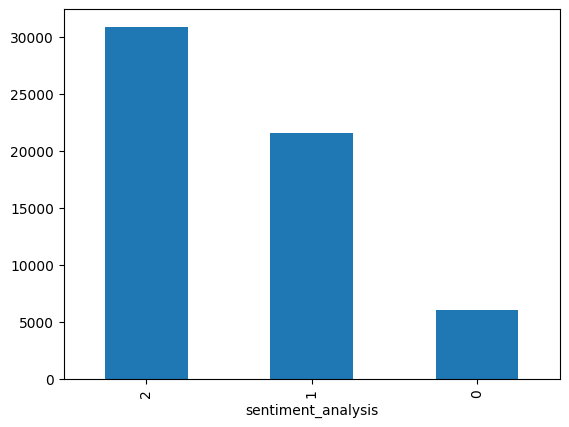

In [ ]:
reviews.sentiment_analysis.value_counts().plot(kind="bar")

## Guardar DataFrame

In [ ]:
reviews_df["sentiment_analysis"] = reviews["sentiment_analysis"].astype(int)
reviews_df.head()

,item_id,recommend,review,user_id,sentiment_analysis
0,1250,True,Simple yet with great replayability. In my opi...,76561197970982479,2
1,22200,True,It's unique and worth a playthrough.,76561197970982479,1
2,43110,True,Great atmosphere. The gunplay can be a bit chu...,76561197970982479,2
3,251610,True,I know what you think when you see this title ...,js41637,2
4,227300,True,For a simple (it's actually not all that simpl...,js41637,2


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58431 entries, 0 to 59304
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_id             58431 non-null  object
 1   recommend           58431 non-null  bool  
 2   review              58431 non-null  object
 3   user_id             58431 non-null  object
 4   sentiment_analysis  58431 non-null  int64 
dtypes: bool(1), int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
reviews_df.to_csv("/content/drive/MyDrive/reviews.csv", index=False)

# Items

In [ ]:
items_dict = {"data":[]}
#Leer línea por línea, convertir a String y guardar
with gzip.open("/content/drive/MyDrive/users_items.json.gz", "r") as f:
#with gzip.open("users_items.json.gz", "r") as f:
  for l in f:
    items_dict["data"].append(ast.literal_eval(l.decode(encoding='utf-8')))
print(items_dict["data"][0])

#Convertir a DataFrame
items_df = pd.DataFrame(items_dict["data"])
items_df.head()

{'user_id': '76561197970982479', 'items_count': 277, 'steam_id': '76561197970982479', 'user_url': 'http://steamcommunity.com/profiles/76561197970982479', 'items': [{'item_id': '10', 'item_name': 'Counter-Strike', 'playtime_forever': 6, 'playtime_2weeks': 0}, {'item_id': '20', 'item_name': 'Team Fortress Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '30', 'item_name': 'Day of Defeat', 'playtime_forever': 7, 'playtime_2weeks': 0}, {'item_id': '40', 'item_name': 'Deathmatch Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '50', 'item_name': 'Half-Life: Opposing Force', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '60', 'item_name': 'Ricochet', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '70', 'item_name': 'Half-Life', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '130', 'item_name': 'Half-Life: Blue Shift', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '300', 'item_name': 'Day of Defeat: Source', '

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [ ]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      88310 non-null  object
 1   items_count  88310 non-null  int64 
 2   steam_id     88310 non-null  object
 3   user_url     88310 non-null  object
 4   items        88310 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


<p>De forma similar al registro de reviews, cada fila del dataframe contiene un usuario por fila, y cada usuario tiene muchos items, por tanto, se aplanará el DataFrame.

In [ ]:
items = {"data":[]}

#Para cada elemento del DataFrame:
# - Leer el user_id y los items del usuario
# - Añadir a cada item el user_id y almacenarlas
#Luego, guardar los items en el dataframe
for index, row in items_df.iterrows():
  #items_usr = []
  user_id = row["user_id"]
  list_items_usr = row["items"]
  for i in list_items_usr:
    i["user_id"] = user_id
    items["data"].append(i)

#Convertir a DataFrame
items_df = pd.DataFrame(items["data"])
items_df.head()

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
0,10,Counter-Strike,6,0,76561197970982479
1,20,Team Fortress Classic,0,0,76561197970982479
2,30,Day of Defeat,7,0,76561197970982479
3,40,Deathmatch Classic,0,0,76561197970982479
4,50,Half-Life: Opposing Force,0,0,76561197970982479


In [ ]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5153209 entries, 0 to 5153208
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           object
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   user_id           object
dtypes: int64(2), object(3)
memory usage: 196.6+ MB


In [ ]:
items_df[items_df.item_id == "10"]

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
0,10,Counter-Strike,6,0,76561197970982479
277,10,Counter-Strike,0,0,js41637
1302,10,Counter-Strike,0,0,Riot-Punch
1635,10,Counter-Strike,93,0,doctr
3737,10,Counter-Strike,108,0,corrupted_soul
...,...,...,...,...,...
5150423,10,Counter-Strike,21,0,76561198273508956
5150611,10,Counter-Strike,1,0,76561198282090798
5150664,10,Counter-Strike,0,0,943525
5150692,10,Counter-Strike,6,0,76561198283312749


## Eliminar duplicados

In [ ]:
items_df.duplicated().sum()

59104

In [ ]:
items_df[items_df.duplicated()]

,item_id,item_name,playtime_forever,playtime_2weeks,user_id
164294,20,Team Fortress Classic,5,0,Nikiad
164295,50,Half-Life: Opposing Force,0,0,Nikiad
164296,70,Half-Life,0,0,Nikiad
164297,130,Half-Life: Blue Shift,0,0,Nikiad
164298,220,Half-Life 2,198,0,Nikiad
...,...,...,...,...,...
4898223,213670,South Park™: The Stick of Truth™,725,0,76561198080057659
4898224,221910,The Stanley Parable,53,0,76561198080057659
4898225,261030,The Walking Dead: Season Two,253,0,76561198080057659
4898226,273110,Counter-Strike Nexon: Zombies,0,0,76561198080057659


In [ ]:
items_df.drop_duplicates(inplace=True)
print(items_df.duplicated().sum())
items_df.info()

0
<class 'pandas.core.frame.DataFrame'>
Index: 5094105 entries, 0 to 5153208
Data columns (total 5 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           object
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   user_id           object
dtypes: int64(2), object(3)
memory usage: 233.2+ MB


## Eliminar columnas innecesarias

In [ ]:
items_df.drop(columns=["item_name"], inplace=True)

In [ ]:
items_df.drop(columns=["playtime_2weeks"], inplace=True)

In [ ]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5094105 entries, 0 to 5153208
Data columns (total 3 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           object
 1   playtime_forever  int64 
 2   user_id           object
dtypes: int64(1), object(2)
memory usage: 155.5+ MB


## Guardar DataFrame

In [ ]:
items_df.to_csv("items.csv", index=False)

In [ ]:
#Dividir archivo csv en 6 partes
rows_per_file = len(items_df) // 6
for i in range(6):
    start = i * rows_per_file
    end = (i + 1) * rows_per_file
    filename = f"items{i}.csv"
    items_df.iloc[start:end].to_csv(filename, index=False)